In [1]:
#Data Preprocessing
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

#Text Preprocessing
import string
from nltk.corpus import stopwords

#TF-IDF Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Train-test-split
from sklearn.model_selection import train_test_split

#Training Model
from sklearn.naive_bayes import MultinomialNB

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#Loading the csv
df = pd.read_csv("dataset/spam.csv", encoding="latin-1")
df.head()   

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
#Keeping only required columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Data Inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#Checking for NULL values
df.isnull().sum()

label      0
message    0
dtype: int64

In [7]:
df.shape

(5572, 2)

In [8]:
df.columns

Index(['label', 'message'], dtype='object')

In [9]:
#Understanding the data
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

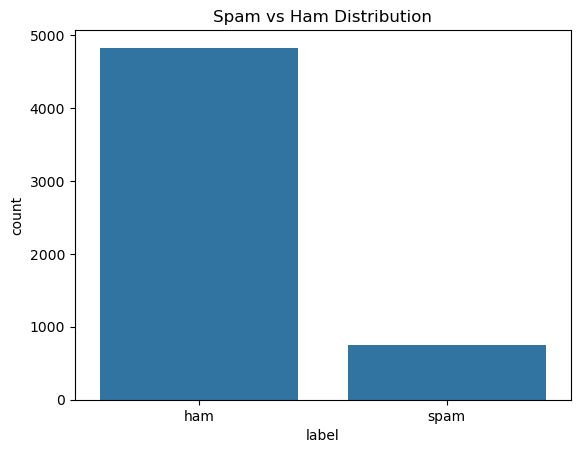

In [10]:
#Data Visualization
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

In [11]:
#Text Preprocessing
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('','',string.punctuation))
    words = text.split()
    words = [w for w in words if w not in stopwords.words('english') ]
    return " ".join(words)

df['clean_message'] = df['message'].apply(clean_text)   #Making a clean message column
df.head()

,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [12]:
#Mapping text to numbers
df['label_num'] = df['label'].map({'ham':0, 'spam':1})
df[['label','label_num']].head()

,label,label_num
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


In [13]:
#Feature Extraction
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['clean_message'])
y = df['label_num']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.25,
    random_state = 42
)

In [15]:
#Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
#Making Predictions
y_pred = model.predict(X_test)

In [17]:
#Evaulation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Classification: ", classification_report(y_test, y_pred))

Accuracy:  0.9770279971284996
Confusion Matrix:  [[1202    0]
 [  32  159]]
Classification:                precision    recall  f1-score   support

           0       0.97      1.00      0.99      1202
           1       1.00      0.83      0.91       191

    accuracy                           0.98      1393
   macro avg       0.99      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393

